## VAEs on MNIST - Experiments

#### Imports

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import vaes_ptorch.experiments as exp

In [31]:
full_data = exp.load_experiments_data(exp.EXP_PATH)

48 experiment files to collate


In [32]:
df = pd.DataFrame(full_data)

In [33]:
df.head()

,info_vae,div_scale,latent_dim,lr,batch_size,num_epochs,eval_share,eval_error,test_error
0,1,1000.00,10,0.001,128,15,0.3,2672.846261,771.028529
1,0,10.00,10,0.001,128,15,0.3,2441.911650,198.964244
2,0,100.00,10,0.001,128,15,0.3,2080.690701,206.196567
3,1,0.01,10,0.001,128,15,0.3,5306.091172,4172.115140
4,1,100.00,10,0.001,128,15,0.3,2902.709581,785.068846


In [34]:
df.isna().sum(0)

info_vae      0
div_scale     0
latent_dim    0
lr            0
batch_size    0
num_epochs    0
eval_share    0
eval_error    0
test_error    0
dtype: int64

In [35]:
common_divs = [10.0, 100.0, 1000.0, 10000.0]

In [36]:
df = df.fillna(1e12)

### Divergence scale plot

In [37]:
# all with latent dim of 10
plot_df = df.loc[df.latent_dim == 10, :]
divs = []
info_vae_errors = []
plain_errors = []
common_divs = df.loc[df.info_vae == 1, :].div_scale.unique()
for div_scale, grouped_df in plot_df.groupby('div_scale'):
    if div_scale not in common_divs:
        continue
    divs.append(div_scale)
    data = grouped_df.loc[grouped_df.info_vae == 0, ['lr', 'eval_error', 'test_error']].groupby('lr').agg(['mean'])
    selected_lr = data.loc[:, ('eval_error', 'mean')].idxmin()
    print(f"Vanilla VAE: selected learning rate is {selected_lr} for divergence scale {div_scale}")
    plain_errors.append(data.loc[selected_lr].test_error)
    
    data = grouped_df.loc[grouped_df.info_vae == 1, ['lr', 'eval_error', 'test_error']].groupby('lr').agg(['mean'])
    selected_lr = data.loc[:, ('eval_error', 'mean')].idxmin()
    print(f"Info VAE: selected learning rate is {selected_lr} for divergence scale {div_scale}")
    info_vae_errors.append(data.loc[selected_lr].test_error)

Vanilla VAE: selected learning rate is 0.001 for divergence scale 0.001
Info VAE: selected learning rate is 0.001 for divergence scale 0.001
Vanilla VAE: selected learning rate is 0.001 for divergence scale 0.01
Info VAE: selected learning rate is 0.001 for divergence scale 0.01
Vanilla VAE: selected learning rate is 0.001 for divergence scale 0.1
Info VAE: selected learning rate is 0.001 for divergence scale 0.1
Vanilla VAE: selected learning rate is 0.001 for divergence scale 1.0
Info VAE: selected learning rate is 0.001 for divergence scale 1.0
Vanilla VAE: selected learning rate is 0.001 for divergence scale 10.0
Info VAE: selected learning rate is 0.001 for divergence scale 10.0
Vanilla VAE: selected learning rate is 0.001 for divergence scale 100.0
Info VAE: selected learning rate is 0.001 for divergence scale 100.0
Vanilla VAE: selected learning rate is 0.001 for divergence scale 1000.0
Info VAE: selected learning rate is 0.001 for divergence scale 1000.0
Vanilla VAE: selected l

In [38]:
divs

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

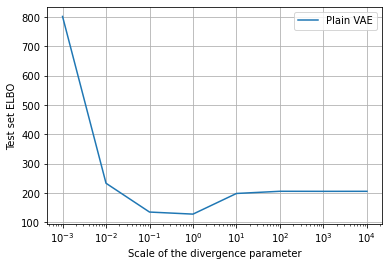

In [41]:
plt.figure()
plt.plot(divs, plain_errors, label="Plain VAE")
# plt.plot(divs, info_vae_errors, label="Info VAE")
plt.grid()
plt.xscale("log")
# plt.yscale("log")
plt.ylabel("Test set ELBO")
plt.xlabel("Scale of the divergence parameter")
plt.legend()
plt.savefig("nll_comparison_mnist.png")
plt.show()
plt.close()